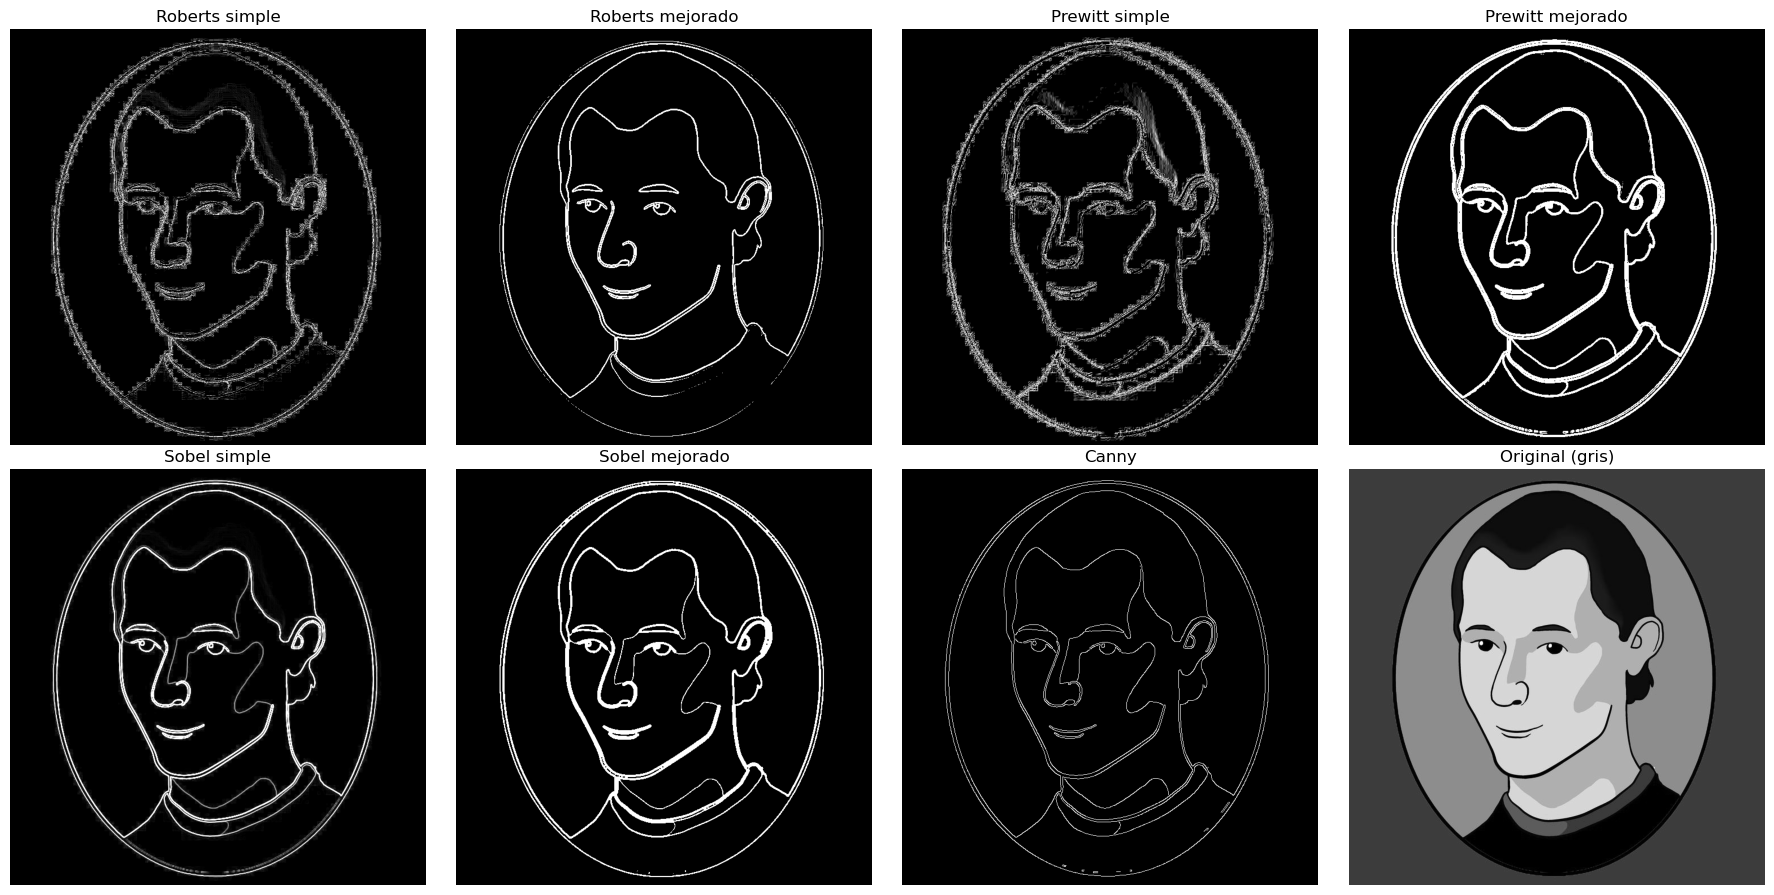

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def roberts_simple(img_gray):
    robertsx = np.array([[-1, 0], [0, 1]])
    robertsy = np.array([[0, -1], [1, 0]])
    
    robx = cv2.filter2D(img_gray, -1, robertsx)
    roby = cv2.filter2D(img_gray, -1, robertsy)
    
    magnitud = np.sqrt(robx**2 + roby**2)
    return np.uint8(magnitud)

def prewitt_simple(img_gray):
    prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    x = cv2.filter2D(img_gray, -1, prewittx)
    y = cv2.filter2D(img_gray, -1, prewitty)
    
    magnitud = np.sqrt(x**2 + y**2)
    return np.uint8(magnitud)

def sobel_simple(img_gray):
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    
    magnitud = np.sqrt(sobelx**2 + sobely**2)
    return cv2.convertScaleAbs(magnitud)

def canny(img_gray):
    return cv2.Canny(img_gray, 100, 200)


def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)

    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)

    roberts = cv2.addWeighted(np.abs(robx), 0.7, np.abs(roby), 0.7, 0)
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
    return bordes

def prewitt_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    prewittx = np.array([[1, 3, 1], [0, 0, 0], [-1, -3, -1]], dtype=np.float32)
    prewitty = np.array([[1, 0, -1], [3, 0, -3], [1, 0, -1]], dtype=np.float32)
    
    x = cv2.filter2D(img_gray, cv2.CV_64F, prewittx)
    y = cv2.filter2D(img_gray, cv2.CV_64F, prewitty)

    magnitud = np.sqrt(x**2 + y**2)
    _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)
    return bordes

def sobel_mejorado(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    
    magnitud = np.sqrt(sobelx**2 + sobely**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY)
    
    # Unión de bordes rotos
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    
    return bordes


imagen = cv2.imread('maquiavelo.jpg')
img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

resultados = [
    ("Roberts simple", roberts_simple(img_gray)),
    ("Roberts mejorado", roberts_mejorado(imagen)),
    ("Prewitt simple", prewitt_simple(img_gray)),
    ("Prewitt mejorado", prewitt_mejorado(imagen)),
    ("Sobel simple", sobel_simple(img_gray)),
    ("Sobel mejorado", sobel_mejorado(imagen)),
    ("Canny", canny(img_gray)),
    ("Original (gris)", img_gray)
]

# ------------------- Mostrar resultados -------------------

fig, axs = plt.subplots(2, 4, figsize=(18, 9))
axs = axs.ravel()

for i, (titulo, resultado) in enumerate(resultados):
    axs[i].imshow(resultado, cmap='gray')
    axs[i].set_title(titulo)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

